In [1]:
import pandas as pd

In [2]:
file_url = './make_file/광진구_자동차도로_전체.csv'

In [3]:
data = pd.read_csv(file_url)
data.head() 

,도로명,도로 종류,시작점_위도,시작점_경도,종료점_위도,종료점_경도,중앙점_위도,중앙점_경도,도로_길이,터널 여부,교량 여부,서비스 도로 여부,도로 ID,속도 제한,차선 수,일방통행 여부,교차로 여부
0,"['광장앞지하차도', '광장로']",3차로,37.545509,127.097772,37.546747,127.102031,37.546128,127.099902,430.542185,yes,NaN,NaN,"[175320385, 175320419, 175320429]",NaN,NaN,NaN,NaN
1,워커힐로,주거지 도로,37.545509,127.097772,37.546447,127.098044,37.545978,127.097908,107.043667,NaN,NaN,NaN,516647748,NaN,NaN,NaN,NaN
2,워커힐로,주거지 도로,37.545509,127.097772,37.543981,127.097208,37.544745,127.097490,177.203342,NaN,NaN,NaN,516647752,NaN,NaN,NaN,NaN
3,자양번영로,3차로,37.533200,127.075680,37.533816,127.075863,37.533508,127.075772,70.349590,NaN,NaN,NaN,37401581,30.0,4,NaN,NaN
4,자양번영로,3차로,37.533200,127.075680,37.532597,127.075517,37.532898,127.075599,68.552097,NaN,NaN,NaN,516723466,NaN,NaN,NaN,NaN


In [4]:
start_lat = data['시작점_위도'].to_list()
start_lon = data['시작점_경도'].to_list()

end_lat = data['종료점_위도'].to_list()
end_lon = data['종료점_경도'].to_list()

avg_lat = data['중앙점_위도'].to_list()
avg_lon = data['중앙점_경도'].to_list()

In [5]:
print(f'기점 위도의 길이 : {len(start_lat)}')
print(f'기점 경도의 길이 : {len(start_lon)}')

print(f'종점 위도의 길이 : {len(end_lat)}')
print(f'종점 경도의 길이 : {len(end_lon)}')


기점 위도의 길이 : 8288
기점 경도의 길이 : 8288
종점 위도의 길이 : 8288
종점 경도의 길이 : 8288


In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

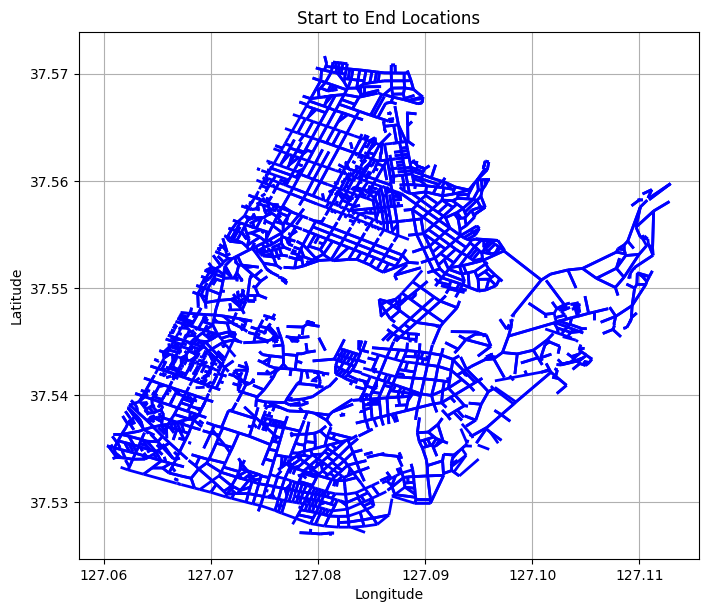

In [7]:

# 선 데이터 생성
lines = [LineString([(lon1, lat1), (lon2, lat2)]) for lon1, lat1, lon2, lat2 in zip(start_lon, start_lat, end_lon, end_lat)]

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(geometry=lines)

# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color='blue', linewidth=2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start to End Locations")
plt.grid()

plt.savefig('./make_file/불러온_자동차_도로_시각화.png', dpi = 1200) 


In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from tqdm import tqdm  # 진행 상태를 표시할 tqdm 라이브러리 임포트

# 선 데이터 생성 (tqdm으로 진행 상황 표시)
lines = []
for lon1, lat1, lon2, lat2 in tqdm(zip(start_lon, start_lat, end_lon, end_lat), desc="Generating Lines", total=len(start_lon)):
    lines.append(LineString([(lon1, lat1), (lon2, lat2)]))

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(geometry=lines, crs="EPSG:4326")

# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color='blue', linewidth=2)

# avg_lat과 avg_lon 배열에 대해서 진행 상황 표시
for i in tqdm(range(len(avg_lat)), desc="Plotting Points"):
    ax.scatter(avg_lon[i], avg_lat[i], color='yellow', s=50, marker='*')  

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start to End Locations")
plt.grid()

# 파일로 저장
plt.savefig('./make_file/불러온_자동차_도로_시각화(중앙포함).png', dpi=1800) 


In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from shapely.geometry import LineString


# 지도 생성
m = folium.Map(location=[sum(start_lat)/len(start_lat), sum(start_lon)/len(start_lon)], zoom_start=13)

# 선 데이터 추가
for lat1, lon1, lat2, lon2 in zip(start_lat, start_lon, end_lat, end_lon):
    folium.PolyLine([(lat1, lon1), (lat2, lon2)], color='blue', weight=2.5, opacity=1).add_to(m)

m.save('./make_file/불러온_자동차_도로_시각화.html') 

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from shapely.geometry import LineString


# 지도 생성
m = folium.Map(location=[sum(start_lat)/len(start_lat), sum(start_lon)/len(start_lon)], zoom_start=13)

# 선 데이터 추가
for lat1, lon1, lat2, lon2 in zip(start_lat, start_lon, end_lat, end_lon):
    folium.PolyLine([(lat1, lon1), (lat2, lon2)], color='blue', weight=2.5, opacity=1).add_to(m)


# ⭐ 평균 위치 추가 ⭐
for lat, lon in zip(avg_lat, avg_lon):
    folium.CircleMarker(
        location=[lat, lon],
        radius=1,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.9
    ).add_to(m)
    
m.save('./make_file/불러온_자동차_도로_시각화(중앙포함).html') 


In [11]:
compare_file_url = './make_file/(비교군)광진구_도로_전체.csv'

In [12]:
compare_date = pd.read_csv(compare_file_url)

In [13]:
compare_start_lat = compare_date['시작점_위도'].to_list()
compare_start_lon = compare_date['시작점_경도'].to_list()

compare_end_lat = compare_date['종료점_위도'].to_list()
compare_end_lon = compare_date['종료점_경도'].to_list() 

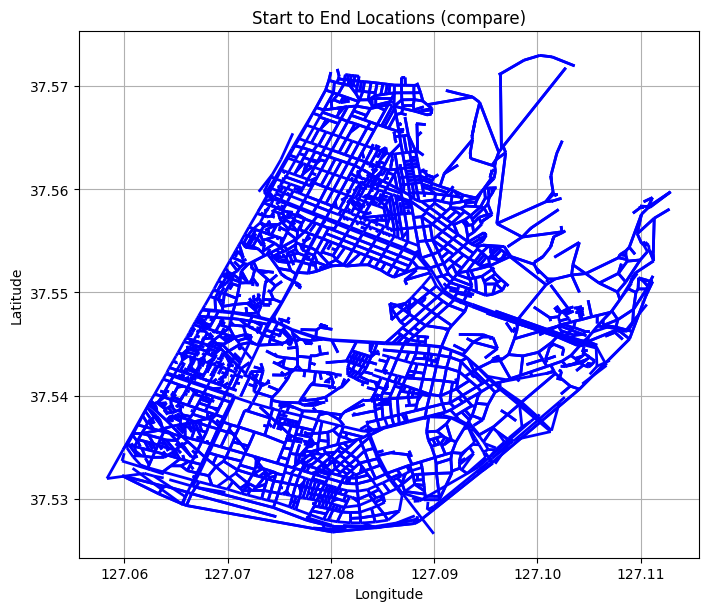

In [14]:

# 선 데이터 생성
lines = [LineString([(lon1, lat1), (lon2, lat2)]) for lon1, lat1, lon2, lat2 
         in zip(compare_start_lon, compare_start_lat, compare_end_lon, compare_end_lat)]

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(geometry=lines)

# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color='blue', linewidth=2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start to End Locations (compare)")
plt.grid()

plt.savefig('./make_file/(비교군)불러온_자동차_도로_시각화.png', dpi = 1200) 


In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from shapely.geometry import LineString


# 지도 생성
m_compare = folium.Map(location=[sum(compare_start_lat)/len(compare_start_lat), 
                         sum(compare_start_lon)/len(compare_start_lon)], zoom_start=13)

# 선 데이터 추가
for lat1, lon1, lat2, lon2 in zip(compare_start_lat, compare_start_lon, compare_end_lat, compare_end_lon):
    folium.PolyLine([(lat1, lon1), (lat2, lon2)], color='blue', weight=2.5, opacity=1).add_to(m_compare)

m_compare.save('./make_file/(비교군)불러온_자동차_도로_시각화.html')  